Conventional retail stores still play a prominent role in a world dominated by Ecommerce. Retail is the process of selling consumer goods or services to customers through multiple channels of distribution to earn a profit. From groceries to clothing to electronics, customers keep flooding the gates of retail stores to satisfy their needs. As time has passed, retailers have had to evolve in order to keep up with changes in demands and the ever-changing mindset of customers. One such retail industry juggernaut that has kept up with the demands of customers as well changed the face of the retail industry for the better is Walmart Inc.

Walmart Inc is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores, headquartered in Bentonville, Arkansas. They have many stores across the globe and it is the largest retail company by revenue.

We have historical sales data for 45 Walmart stores located in different regions. Each store contains a number of departments. Apart from these, weekly data of Fuel price, Holiday, Temperature with some other features are also present in the data set.

In addition, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

Data consists of 421570 records of weekly sales from stores spanning between ’05-Feb-2010’ to ’26-Oct-2012’. This comprises of 143 Weeks of sales data.

Total 16 numbers of attributes are provided in the Data set including Target variable. Attribute definition is: <br>
Store: The store number <br>
Size: Size of the Store <br>
Dept: Department of the Store <br>
Date: Specifying the Week (Friday of every Week) <br>
Temperature: Average temperature in the region (in ℉) <br>
FuelPrice: Cost of fuel in the region <br>
MarkDown1-5: Anonymized data related to promotional markdowns that Walmart is running. Markdown data is only available after November 2011, and is not available for all stores all the time. Any missing value is marked with Null. <br>
CPI: Consumer price index <br>
Unemployment: Unemployment rate <br>
IsHoliday: Whether the week is a special holiday week <br>

Using the above given features, we have to predict the weekly sales of the store with given parameters. 

_Learnings from the Project_
--------------------------------------------------------------
- Exploratory Data Analysis (EDA) techniques.  <br>
- Handling Missing values in a dataset.  <br>
- Using Univariate Analysis.  <br>
- Performing Bi-variate Analysis. <br>
- Time Series ARIMA models Implementation. <br>
- Using multiple metrics to compare the performance of different models <br>


#### _Hypothesis_ ####
__Size of the Store__: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place. It should be segregated into Big, Medium, and Small <br>
__Markdown__: These are promotional ads given by the store, and doesnt happen often, So null is null <br>
__Consumer Price Index__: The Consumer Price Index (CPI) is a measure of the average change overtime in the prices paid by urban consumers for a market basket of consumer goods and services. A low CPI should affect sales <br>
__Relationship btw Sales and other stated facotrs__: IS sales affect by Holiday, Temperature, CPI, Uneployment rate. <br>


In [1]:
# Import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
feat = pd.read_csv(r"C:\Users\HP\Desktop\stutern_school\Capstone Project\Dataset\Walmart Sales Data/features.csv")
store = pd.read_csv(r"C:\Users\HP\Desktop\stutern_school\Capstone Project\Dataset\Walmart Sales Data/stores.csv")
train = pd.read_csv(r"C:\Users\HP\Desktop\stutern_school\Capstone Project\Dataset\Walmart Sales Data/train.csv")
test = pd.read_csv(r"C:\Users\HP\Desktop\stutern_school\Capstone Project\Dataset\Walmart Sales Data/test.csv")

In [3]:
feat

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [4]:
feat.describe()
# feat.info()


,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [5]:
# EDA on Store
print('store size:', store.size)
print(store['Size'].nunique())
print(store['Type'].unique())
print(store.head())


store size: 135
40
['A' 'B' 'C']
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875


Max Size:  219622
Min Size:  34875


count        45.000000
mean     130287.600000
std       63825.271991
min       34875.000000
25%       70713.000000
50%      126512.000000
75%      202307.000000
max      219622.000000
Name: Size, dtype: float64

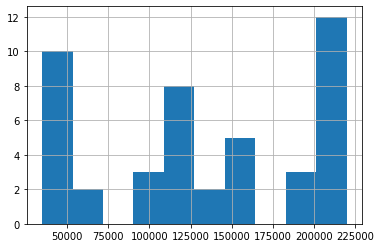

In [6]:
# Make a copy of the store, check the percentiles so to make an equal division into bins('Big, Medium, and Small')
Stores = store.copy()
print('Max Size: ', Stores['Size'].max())
print('Min Size: ', Stores['Size'].min())
Stores['Size'].hist()
store['Size'].describe()

In [7]:
# Turn Store[size] into categorical column
Stores['Size'] = pd.cut(Stores['Size'], bins = [34874, 100000, 160000, 219623], labels= ['small', 'medium', 'big'])

In [8]:
Stores.head()

,Store,Type,Size
0,1,A,medium
1,2,A,big
2,3,B,small
3,4,A,big
4,5,B,small


In [9]:
test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [10]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


#### __Merging__

In [11]:
# Know the columns available in both Train and Features dataset then merge on them
[c for c in feat.columns if c in train.columns]

['Store', 'Date', 'IsHoliday']

In [12]:
# Merge train and features. Train as 'left' because its the major dataset
ds = train.merge(feat, how = 'left', on = ['Store', 'IsHoliday', 'Date']) # Merge train and features
ds

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [13]:
# Check for Duplicates
ds[ds.duplicated()]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment


In [14]:
# Know the columns available in both ds and Stores dataset then merge on them
[c for c in ds.columns if c in store.columns]

['Store']

In [15]:
# Merge ds and store
df = ds.merge(Stores, how = 'left', on = 'Store', )
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,medium
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,medium
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,medium
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,medium
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,medium
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,medium
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,medium
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,medium


In [16]:
df['Size'].value_counts()

medium    157170
big       152535
small     111865
Name: Size, dtype: int64

In [17]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [18]:
# df.info()
print(f'Total number of rows is {df.shape[0]}')
print(f'Total number of columns is {df.shape[1]}')

Total number of rows is 421570
Total number of columns is 16


In [19]:
#Number of missing values
df.isna().sum().sort_values(ascending=False).head()

MarkDown2    310322
MarkDown4    286603
MarkDown3    284479
MarkDown1    270889
MarkDown5    270138
dtype: int64

In [20]:
# Percentage of missing values
df.isna().sum().sort_values(ascending=False).head()/df.shape[0]*100

MarkDown2    73.611025
MarkDown4    67.984676
MarkDown3    67.480845
MarkDown1    64.257181
MarkDown5    64.079038
dtype: float64

In [21]:
df['MarkDown1'].fillna(0, inplace = True)
df['MarkDown2'].fillna(0, inplace = True)
df['MarkDown3'].fillna(0, inplace = True)
df['MarkDown4'].fillna(0, inplace = True)
df['MarkDown5'].fillna(0, inplace = True)
df.isna().sum().sort_values(ascending=False)

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [22]:
# Since only Markdowns have null values, we fill null values with zero 
# for column in ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']:
#     df.fillna(, inplace=True, axis = 1)
# df.isna().sum().sort_values(ascending=False)

In [23]:
# Create week and year column

#converting date to date time object
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract week and year from the date and make them into new columns.
df['week'] = df.Date.dt.isocalendar().week
df['year'] = df.Date.dt.isocalendar().year

# Drop 'date' column
dff = df.drop(columns = 'Date', axis = 1)

In [24]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,medium,5,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,medium,6,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,medium,7,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,medium,8,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,medium,9,2010


In [25]:
df_markdown = df[['MarkDown1', 'MarkDown2', 'MarkDown3','MarkDown4', 'MarkDown5', 'Weekly_Sales']].copy()  # Creating a new dataframe with all MarkDowns and Weekly Sales.
df_markdown['Is_MarkDown'] = df_markdown.iloc[:,0:5].sum(axis=1).apply(lambda x: 0 if x == 0 else 1) # Add one new column 'is_MarkDown'
# Sliced the column by index position (in columns, start at 0, and stop at 5), sum the values, if == 0, enter 0 into is_markdown, else, enter 1 into is_markdown

In [26]:
df_markdown.tail()

,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Weekly_Sales,Is_MarkDown
421565,4556.61,20.64,1.50,1601.01,3288.25,508.37,1
421566,5046.74,0.00,18.82,2253.43,2340.01,628.10,1
421567,1956.28,0.00,7.89,599.32,3990.54,1061.02,1
421568,2004.02,0.00,3.18,437.73,1537.49,760.01,1
421569,4018.91,58.08,100.00,211.94,858.33,1076.80,1


In [27]:
df_is_markdown = df_markdown.loc[df_markdown['Is_MarkDown']==1, 'Weekly_Sales']  # Weekly Sales with MarkDown
df_no_markdown = df_markdown.loc[df_markdown['Is_MarkDown']==0, 'Weekly_Sales']  # Weekly Sales without MarkDown

# Number of records with and without MarkDown
print('Number of records with markdown: {}'.format(df_is_markdown.shape))
print('Number of records without markdown: {}'.format(df_no_markdown.shape)) 

Number of records with markdown: (151432,)
Number of records without markdown: (270138,)


In [28]:
# Show average weekly sales of holidays and normal days
print('Average Weekly Sales with Markdown is {}'.format(df_is_markdown.mean()))
print('Average Weekly Sales without Markdown is {}'.format(df_no_markdown.mean()))

Average Weekly Sales with Markdown is 16177.015243805805
Average Weekly Sales without Markdown is 15871.522017302268


---------------------------------------------------
<h2 style='font-family:rockwell; color:#09917e'> Exploratory Data Analysis:</h2>

In [29]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,medium,5,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,medium,6,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,medium,7,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,medium,8,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,medium,9,2010


In [30]:
# Average Store weekly sales.
avg_sales_per_store = df['Weekly_Sales'].groupby(df['Store']).mean()

# Cast the average sales per store to dataframe and plot a var graph
df_avg_sales_per_store = pd.DataFrame(avg_sales_per_store) # Cast to DataFrame
df_avg_sales_per_store.sort_values("Weekly_Sales",ascending=False).style.bar(align='left',width=98,color='#FFD200') # Plot on a var bar

,Weekly_Sales
Store,
20,29508.301592
4,29161.210415
14,28784.851727
13,27355.136891
2,26898.070031
10,26332.303819
27,24826.984536
6,21913.243624
1,21710.543621


In [31]:
# Average Department weekly sales. 
avg_sales_per_dept = df['Weekly_Sales'].groupby(df['Dept']).mean()

# Cast the average sales per department to dataframe and plot on a var bar
df_avg_sales_per_dept = pd.DataFrame(avg_sales_per_dept) # Cast to Dataframe
df_avg_sales_per_dept.sort_values("Weekly_Sales",ascending=False).style.bar(align='left',width=98,color='#bfff00') # Plot on a var bar

,Weekly_Sales
Dept,
92,75204.870531
95,69824.423080
38,61090.619568
72,50566.515417
65,45441.706224
90,45232.084488
40,44900.702727
2,43607.020113
91,33687.910758


In [32]:
# Total Store weekly sales.
avg_sales_per_store = df['Weekly_Sales'].groupby(df['Store']).sum()

# Cast the average sales per store to dataframe and plot a var graph
df_avg_sales_per_store = pd.DataFrame(avg_sales_per_store) # Cast to DataFrame
df_avg_sales_per_store.sort_values("Weekly_Sales",ascending=False).style.bar(align='left',width=98,color='#FFD200') # Plot on a var bar

,Weekly_Sales
Store,
20,301397792.460000
4,299543953.380000
14,288999911.340000
13,286517703.800000
2,275382440.980000
10,271617713.890000
27,253855916.880000
6,223756130.640000
1,222402808.850000


In [33]:
# Total Department weekly sales. 
avg_sales_per_dept = df['Weekly_Sales'].groupby(df['Dept']).sum()

# Cast the average sales per department to dataframe and plot on a var bar
df_avg_sales_per_dept = pd.DataFrame(avg_sales_per_dept) # Cast to Dataframe
df_avg_sales_per_dept.sort_values("Weekly_Sales",ascending=False).style.bar(align='left',width=98,color='#bfff00') # Plot on a var bar

,Weekly_Sales
Dept,
92,483943341.870000
95,449320162.520000
38,393118136.920000
72,305725152.210000
90,291068463.680000
40,288936022.050000
2,280611174.430000
91,216781705.730000
13,197321569.950000


C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Mean Weekly Sales for 2010')

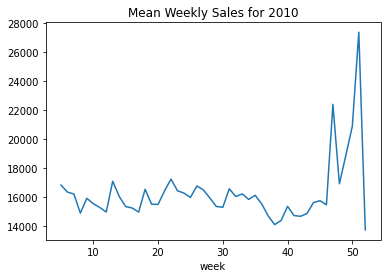

In [34]:
#Filtering out the year ==2010, weekly sales, and grouping by the week
weekly_sales_2010 = df[df['year'] ==  2010]['Weekly_Sales'].groupby(df['week']).mean()

#Plot a line plot with week on x axis and sales for that particular week of the filtered year in y axis
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)
plt.title('Mean Weekly Sales for 2010')

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Mean Weekly Sales for 2011')

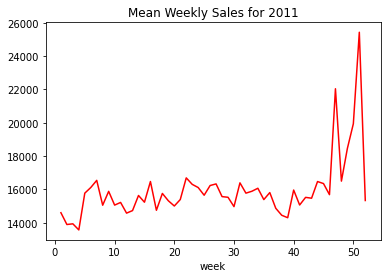

In [35]:
# Filtering out mean weekly sales for the year 2011
weekly_sales_2011 = df[df['year'] ==  2011]['Weekly_Sales'].groupby(df['week']).mean() # df [year](only 2011), and df [weekly] sales groupedby week

# Plot a line plot with week on x axis and sales for that particular week of the filtered year in y axis
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values,color='red')
plt.title('Mean Weekly Sales for 2011')

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Mean Weekly Sales for 2012')

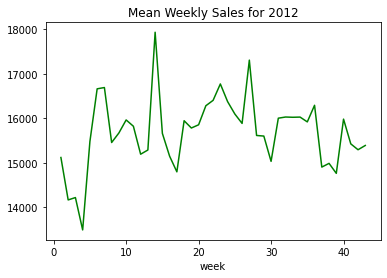

In [36]:
#Filtering out mean weekly sales for the year 2012
weekly_sales_2012 = df[df['year'] ==  2012]['Weekly_Sales'].groupby(df['week']).mean()
#Plot a line plot with week on x axis and sales for that particular week of the filtered year in y axis
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values,color='green')
plt.title('Mean Weekly Sales for 2012')

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

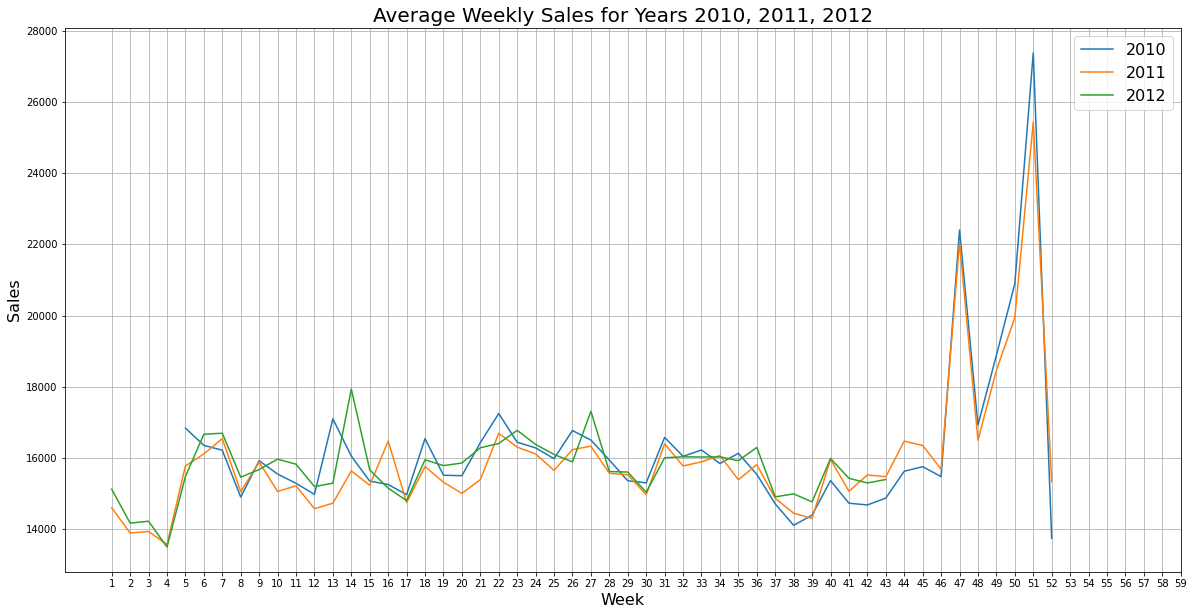

In [37]:
#plotting a figure combining all weekly sales
plt.figure(figsize= (20, 10))
#Plotting three line plots for weekly sales for each year
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values)
plt.grid()
# plot labels and legends
plt.xticks(np.arange(1,60, step= 1))
plt.title('Average Weekly Sales for Years 2010, 2011, 2012', fontsize = 20)
plt.xlabel('Week', fontsize = 16)
plt.ylabel('Sales', fontsize = 16)
plt.legend(['2010', '2011','2012'], loc = 'best', fontsize = 16)
plt.show()

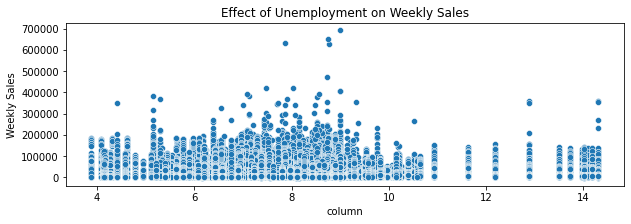

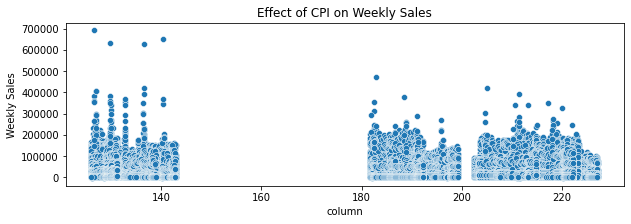

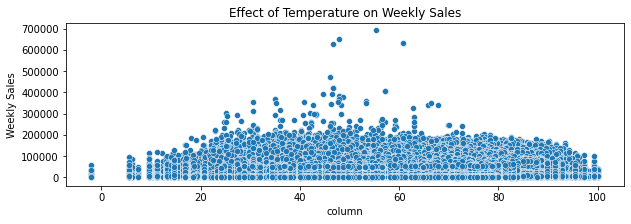

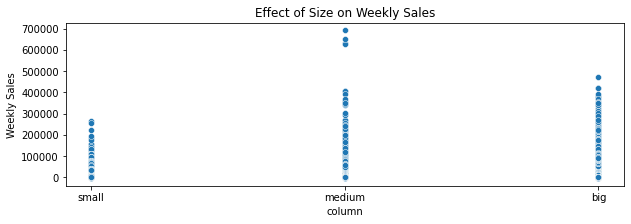

In [38]:
# See how other various factors affect sales 

def Various_Factors(a):
    plt.subplots(figsize= (10, 3))
    sns.scatterplot(x = df[a], y = df['Weekly_Sales'], data = df)
    plt.xlabel('column')
    plt.ylabel('Weekly Sales')
    plt.title('Effect of ' + a + ' on Weekly Sales')
    plt.show()

Various_Factors('Unemployment')
Various_Factors('CPI')
Various_Factors('Temperature')
Various_Factors('Size')   
# We could see that there was no correlation between other factors and weekly sales 

<AxesSubplot:>

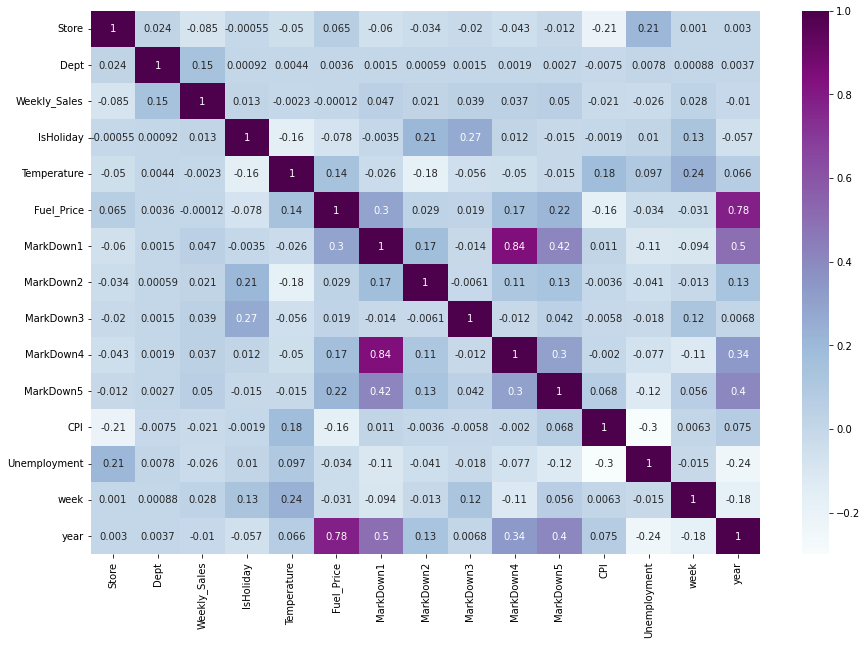

In [39]:
# Correlation Coefficient

corr = dff.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap= 'BuPu')

---------------------------------------------------
<h2 style='font-family:rockwell; color:#09917e'> Preprocessing and Feature Selection:</h2>

In [40]:
dff.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,year
0,1,1,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,medium,5,2010
1,1,1,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,medium,6,2010
2,1,1,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,medium,7,2010
3,1,1,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,medium,8,2010
4,1,1,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,medium,9,2010


In [41]:
# Import Dependencies for preprocessing

from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import math


In [42]:
# Convert 'is_holiday' to numerical value using label encoder

lb_instatiation = LabelEncoder()
dff['IsHoliday'] = lb_instatiation.fit_transform(dff['IsHoliday'])
dff['IsHoliday'].unique()

array([0, 1], dtype=int64)

In [43]:
# Convert Tpye categorical Data to numerical using LabelEncoder
lb_instatiation = LabelEncoder()
dff['Type'] = lb_instatiation.fit_transform(dff['Type'])
dff['Type'].unique()

array([0, 1, 2])

In [44]:
# Convert Size categorical Data to numerical using LabelEncoder
lb_instatiation = LabelEncoder()
dff['Size'] = lb_instatiation.fit_transform(dff['Size'])
dff['Size'].unique()

array([1, 0, 2])

In [45]:
# Make a copy of the DataFrame
dx = dff.copy()

In [46]:
# Feature Selection

# # Split into features(input) and label(output)
x = dx.drop('Weekly_Sales', axis = 1)
Y = dx['Weekly_Sales'] 

# Feature Selection
best_feature = SelectKBest(score_func = f_regression, k = 16) # instantiate the algo
fitting = best_feature.fit(x, Y) # fit the algo to dataset

dxScores = pd.DataFrame(fitting.scores_) # calculates the scores of every column
dxColumns = pd.DataFrame(dx.columns) # stores the column names to dsColumns

featureScores = pd.concat([dxColumns, dxScores], axis = 1) # Concat 'dsScores' and 'dsColumns' for visibility
featureScores.columns = ['spec', 'score'] # names the columns in the concat 

new_feature = featureScores.nlargest(16, 'score')
print(new_feature)

            spec         score
13          Type  27383.744866
12  Unemployment  14482.191681
1           Dept   9444.999393
0          Store   3082.190335
9      MarkDown4   1076.367782
5     Fuel_Price    940.177812
7      MarkDown2    627.818196
8      MarkDown3    592.624706
14          Size    323.091918
11           CPI    282.189019
10     MarkDown5    184.602072
6      MarkDown1    181.002868
2   Weekly_Sales     68.802991
15          week     43.105629
3      IsHoliday      2.254309
4    Temperature      0.006101


In [47]:
dx

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,year
0,1,1,24924.50,0,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,0,1,5,2010
1,1,1,46039.49,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,0,1,6,2010
2,1,1,41595.55,0,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,0,1,7,2010
3,1,1,19403.54,0,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,0,1,8,2010
4,1,1,21827.90,0,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,0,1,9,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,0,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,1,1,39,2012
421566,45,98,628.10,0,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,1,1,40,2012
421567,45,98,1061.02,0,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,1,1,41,2012
421568,45,98,760.01,0,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,1,1,42,2012


#### __TrainTest Split__

In [48]:
y = dx.pop('Weekly_Sales')
X = dx.drop(['week','Temperature', 'IsHoliday'], axis = 1)

In [49]:
# Split into Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print('X_train:', X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (337256, 13)
X_test: (84314, 13)
y_train: (337256,)
y_test: (84314,)


#### __Feature Scaling__

In [50]:
X_train.describe()

,Store,Dept,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year
count,337256.000000,337256.000000,337256.000000,337256.000000,337256.000000,337256.000000,337256.000000,337256.000000,337256.000000,337256.000000,337256.000000,337256.000000,337256.000000
mean,22.193951,44.234742,3.360556,2585.475709,886.795048,466.437520,1078.382374,1658.978543,171.209564,7.960914,0.589834,0.903551,2010.967725
std,12.785325,30.484967,0.458509,6042.413475,5138.706731,5514.342528,3878.976954,4197.409673,39.166385,1.863621,0.666563,0.785985,0.796781
min,1.000000,1.000000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,0.000000,0.000000,2010.000000
25%,11.000000,18.000000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,0.000000,0.000000,2010.000000
50%,22.000000,37.000000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,0.000000,1.000000,2011.000000
75%,33.000000,74.000000,3.737000,2798.440000,2.000000,4.530000,423.220000,2164.960000,212.445487,8.572000,1.000000,2.000000,2012.000000
max,45.000000,99.000000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2.000000,2.000000,2012.000000


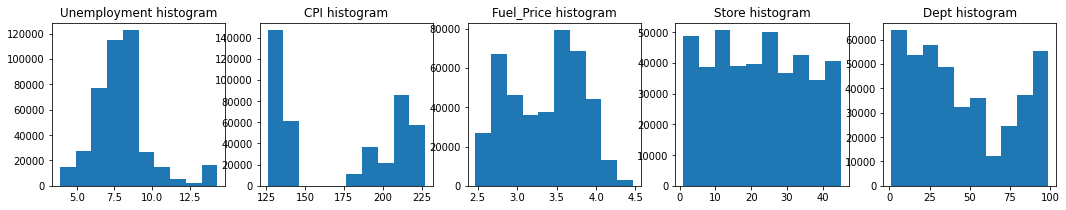

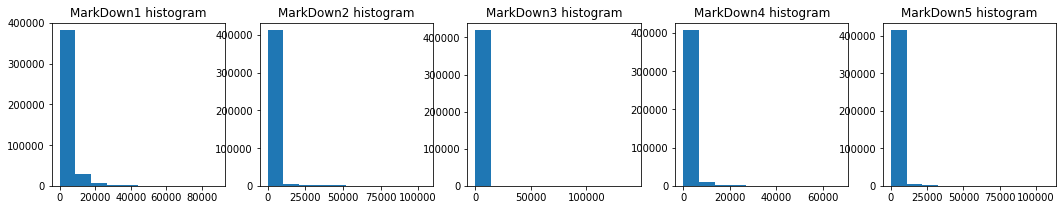

In [51]:
# test for Gaussian or Normal Distribution 
def Normality_Test (a, b, c, d, e):
    plt.figure(figsize =(18,3))
    plt.subplot(1,5,1)
    plt.hist(dx[a] )
    plt.title(a + ' histogram')
    plt.subplot(1,5,2)
    plt.hist(dx[b])
    plt.title(b + ' histogram')
    plt.subplot(1,5,3)
    plt.hist(dx[c])
    plt.title(c + ' histogram')
    plt.subplot(1,5,4)
    plt.hist(dx[d])
    plt.title(d + ' histogram')
    plt.subplot(1,5,5)
    plt.hist(dx[e])
    plt.title(e + ' histogram')
    plt.show()

Normality_Test('Unemployment', 'CPI','Fuel_Price', 'Store', 'Dept')
Normality_Test('MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5')

The Dataset is not a Gaussian Distribution. Hence, we normalize so to rescale numeric attributes into a range of 0 - 1.

In [52]:
# Select Desired Columns
selColumns = ['Unemployment', 'CPI','Fuel_Price', 'Store', 'Dept', 'year',
                'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Type', 'Size']

In [53]:
# copy the train and test dataframe
x_train_stand = X_train.copy()
x_test_stand = X_test.copy()

In [54]:
for i in selColumns:
    scaler = MinMaxScaler().fit(x_train_stand[[i]])
    x_train_stand[i] = scaler.transform(x_train_stand[[i]])
    x_test_stand[i] = scaler.transform(x_test_stand[[i]])

In [55]:
x_train_stand.head()

,Store,Dept,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year
31607,0.068182,0.153061,0.414329,0.0,0.002536,0.000205,0.0,0.0,0.035879,0.121142,0.0,0.0,0.5
387354,0.909091,0.540816,0.467936,0.0,0.002536,0.000205,0.0,0.0,0.652966,0.322216,0.0,0.0,0.5
169266,0.386364,0.132653,0.705411,0.0,0.002536,0.000205,0.0,0.0,0.099637,0.480257,0.5,0.5,0.5
403707,0.954545,0.918367,0.430862,0.0,0.002536,0.000205,0.0,0.0,0.824881,0.600824,1.0,1.0,0.5
143143,0.318182,0.377551,0.460421,0.0,0.002536,0.000205,0.0,0.0,0.068841,0.373011,0.5,0.5,0.5


In [56]:
# rename for shorthand
xtrain = x_train_stand.copy()
xtest = x_test_stand.copy()
ytrain = y_train.copy()
ytest = y_test.copy()

---------------------------------------------------
<h2 style='font-family:rockwell; color:#09917e'> Time Series Data Analysis Using Arima:</h2>

In [57]:
tsa_data = df[['Date', 'Weekly_Sales']] # pick a subset of the df data
tsa_data = tsa_data.set_index('Date')
tsa_data.head()

,Weekly_Sales
Date,
2010-02-05,24924.50
2010-02-12,46039.49
2010-02-19,41595.55
2010-02-26,19403.54
2010-03-05,21827.90


In [58]:
# Aggregating Data into Weekly Frequency
weekly_resample = tsa_data.resample("W").mean()
weekly_resample

,Weekly_Sales
Date,
2010-02-07,16836.121997
2010-02-14,16352.056032
2010-02-21,16216.658979
2010-02-28,14899.549688
2010-03-07,15921.015727
...,...
2012-09-30,14765.327279
2012-10-07,15983.413747
2012-10-14,15427.596739


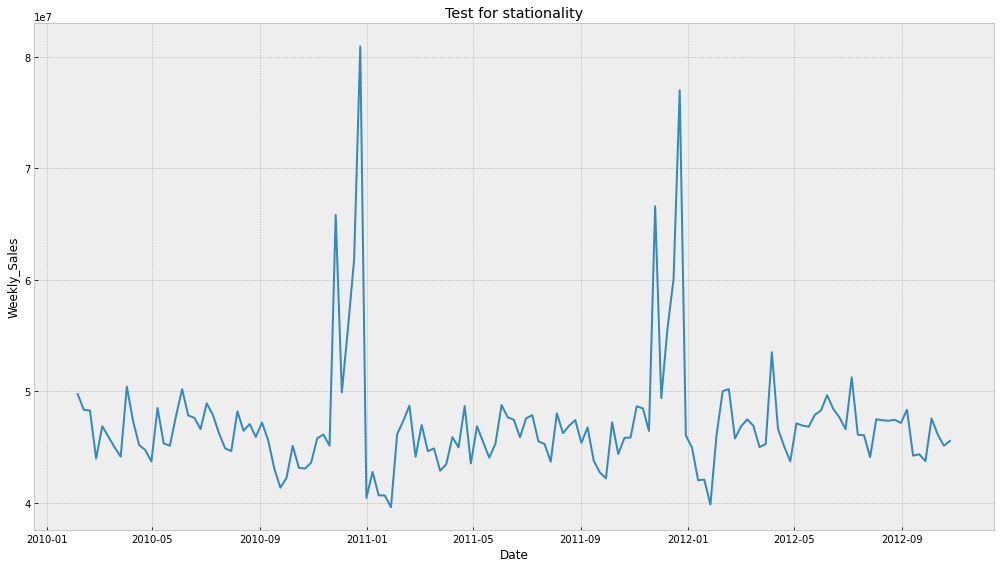

In [59]:
with plt.style.context("bmh"):
    plt.figure(figsize=(14, 8))
    plt.title('Test for stationality')
    sns.lineplot(data = df.groupby("Date")["Weekly_Sales"].sum() )
    plt.tight_layout()

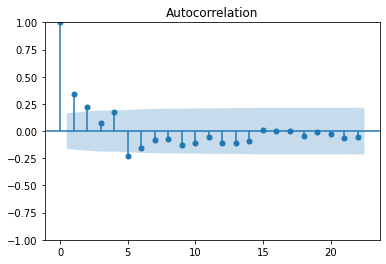

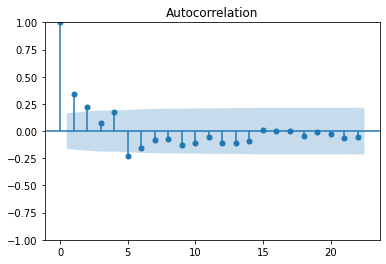

In [60]:
# Test for Stationality
ts = df.groupby("Date")["Weekly_Sales"].sum()

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts)

In [61]:
# Using Augmented Dickey Fuller Test to Test for stationarity
from statsmodels.tsa.stattools import adfuller

def dickeyFuller(weekly_resample):
    dftest = adfuller(weekly_resample, autolag = 'AIC', regression = 'ct')
    print('1. ADF: ',dftest[0])
    print('2. P-value: ',dftest[1])
    print('3. Nums of Lags: ', dftest[2])
    print('4. Num of observations for ADF Regression and Critical Values Calculation: ',dftest[3] )
    print('5. Critical Values: ')
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)

In [62]:
# RUn a Dickey Fuller test on the resampled mean dataset
dickeyFuller(weekly_resample['Weekly_Sales'])

1. ADF:  -5.907201849136546
2. P-value:  3.434434795005403e-06
3. Nums of Lags:  4
4. Num of observations for ADF Regression and Critical Values Calculation:  138
5. Critical Values: 
	 1% :  -4.025915974463409
	 5% :  -3.4427962380330523
	 10% :  -3.1460008492918003


Convert to Stationary

In [63]:
# Made a differencing of period 1
diff = ts.diff(periods = 1) # shifts the weekly sales value 1step below, so we can check for autocorrelation
diff.head() 

Date
2010-02-05           NaN
2010-02-12   -1414062.87
2010-02-19     -59683.85
2010-02-26   -4308422.65
2010-03-05    2902899.17
Name: Weekly_Sales, dtype: float64

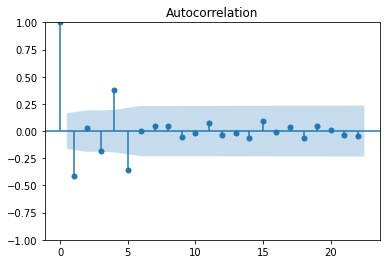

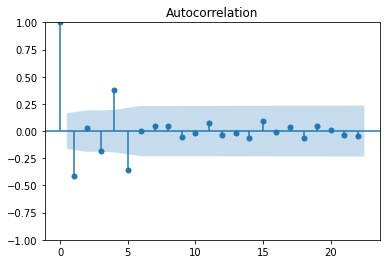

In [64]:
# Show Autocorrelation
plot_acf(diff[1:])

<AxesSubplot:title={'center':'Test for stationality'}, xlabel='Date', ylabel='Weekly_Sales'>

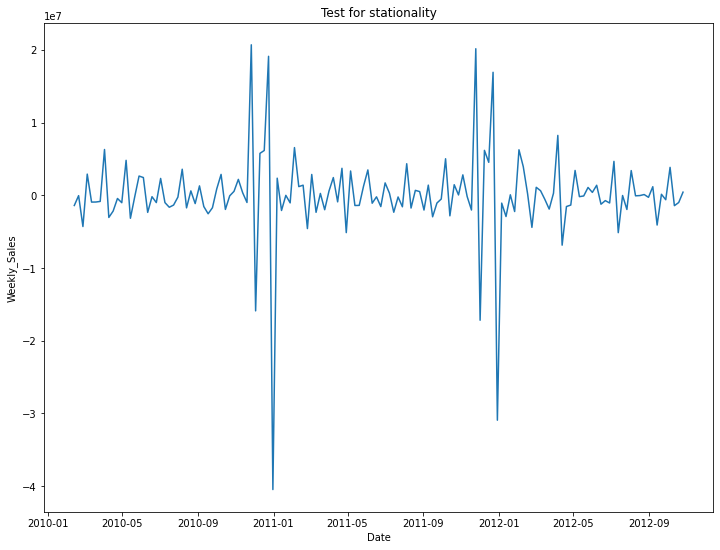

In [65]:
# Plot the differenced dataset on a line plot to test for stationarity
plt.figure(figsize=(12, 9))
plt.title('Test for stationality')
sns.lineplot(data =diff)

Time Series Data is now Stationary

#### _ARIMA MODEL_ 

In [66]:
from statsmodels.tsa.arima.model import ARIMA
# pip install pmdarima
from pmdarima import auto_arima

In [67]:
instantiate the model
PMD_model = auto_arima(diff[1:], trace = True)
PMD_model.summary()

we choose the minimum AIC score

In [68]:
# define model parameters
p=2
d=1 
q = 3
P = 2
D=1 
Q = 3
s = 52
ts = diff[1:]
arima_model = ARIMA(ts, order=(p, d, q), seasonal_order=(P, D, Q, s))
arima_model = arima_model.fit()
arima_model.summary()

#### __Prediction__ ####

In [69]:
from statsmodels.graphics.tsaplots import plot_predict
fig, ax = plt.subplots(figsize=(10, 8))
fig = plot_predict(arima_model, start="2010-02-12", end="2013-04-01", ax=ax)
legend = ax.legend(loc="upper left")

In [70]:
import plotly.graph_objects as go

# Calculate MAE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def plotSARIMA(ts, model, n_steps):
    data = pd.DataFrame(ts)
    data.columns = ['actual']
    data['model'] = model.fittedvalues
    data['model'][:s+d] = np.NaN
    
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.model.append(forecast)
    error = mean_absolute_percentage_error(data['actual'][s+d:], data['model'][s+d:])

    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x=data.index,
            y=data["actual"],
            name="Actual",
        ))
    fig.add_trace(
        go.Scatter(
            x=forecast.index,
            y=forecast,
            name="Model",
    ))
    fig.add_vrect(
    x0=data.index[-1], x1=forecast.index[-1],
    fillcolor="LightSalmon", opacity=0.5,
    layer="below", line_width=0)
    
    fig.update_layout(
        title=f"Mean Absolute Percentage Error: {error:.2f}%",
        xaxis_title="weeks",
        yaxis_title="sales",
        yaxis_tickprefix = '$',
        font=dict(
            family="Courier New, monospace",
            size=18,
            color="RebeccaPurple"
        ))
    fig.update_xaxes(rangeslider_visible=True)
    fig.show()
    
plotSARIMA(ts, arima_model, 26)




 ---------------------------------------------------
<h2 style='font-family:rockwell; color:#09917e'> Modelling:</h2>

For the Purpose of this Project, we will be using the following alghorithms to build our model: <bn>
- Linear Regression
- RandomForest Regression
- XGBoost
- TensorFlow


In [71]:
# Import Dependencies For Model BUilding 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import tensorflow as tf
import warnings
# warnings.filterwarnings("ignore")
import math
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve, auc

--------------------------------------------
#### __RandomForest Regressor__ 

In [72]:
rfr = RandomForestRegressor()
rfr_model = rfr.fit(xtrain,ytrain)
rfr_train_pred = rfr_model.predict(xtrain)
rfr_train_score = r2_score(ytrain, rfr_train_pred )
print('R-Squared value for train score check:', rfr_train_score )# Check how well the model predicts itself

rfr_test_pred = rfr_model.predict(xtest)
rfr_test_score = r2_score(ytest, rfr_test_pred )
print('R-Squared value for test score check:', rfr_test_score )# Check how well the model predict foreign data

# Mean Squared Error
mse = mean_squared_error(ytest, rfr_test_pred)
print('Root mean square error:', mse)

In [73]:
rfr_comparism = pd.concat([pd.Series(rfr_test_pred, name = 'pred_sales'), ytest.reset_index()], axis = 1)
rfr_comparism['error'] = rfr_comparism['Weekly_Sales'] - rfr_comparism['pred_sales']
rfr_comparism['squared_error'] = rfr_comparism['error']**2
print("RMSE: ",np.sqrt(rfr_comparism[['squared_error']].sum()))
rfr_comparism.drop('index', axis = 1, inplace = True)
rfr_comparism


In [74]:
Plot the prediction on a graph
ytest_array = np.array(ytest)

plt.scatter(ytest_array, rfr_test_pred)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')

---------------------------------------------------
_DecisionTree Regreesor_

In [75]:
dtr = DecisionTreeRegressor()
dtr_model = dtr.fit(xtrain,ytrain)
dtr_train_pred = dtr_model.predict(xtrain)
dtr_train_score = r2_score(ytrain, dtr_train_pred )
print('R-Squared value for train score check:', dtr_train_score )# Check how well the model predicts itself

dtr_test_pred = dtr_model.predict(xtest)
dtr_test_score = r2_score(ytest, dtr_test_pred )
print('R-Squared value for test score check:', dtr_test_score )# Check how well the model predict foreign data

# Root Mean Squared Error
mse = mean_squared_error(ytest, dtr_test_pred)
rmse = math.sqrt(mse)
print('Root mean square error:', rmse)

R-Squared value for train score check: 1.0
R-Squared value for test score check: 0.9142511033119304
Root mean square error: 6584.604781654347


In [76]:
# Create a table to check the mean errors in the prediction
dtr_comparism = pd.concat([pd.Series(dtr_test_pred, name = 'pred_sales'), ytest.reset_index()], axis = 1)
dtr_comparism['error'] = dtr_comparism['Weekly_Sales'] - dtr_comparism['pred_sales']
dtr_comparism['squared_error'] = dtr_comparism['error']**2
print("RMSE: ",np.sqrt(dtr_comparism[['squared_error']].sum()))
dtr_comparism.drop('index', axis = 1, inplace = True)
dtr_comparism


RMSE:  squared_error    1.911963e+06
dtype: float64


,pred_sales,Weekly_Sales,error,squared_error
0,9083.94,11469.25,2385.31,5.689704e+06
1,7275.86,6068.64,-1207.22,1.457380e+06
2,25645.77,32478.39,6832.62,4.668470e+07
3,23929.17,19785.66,-4143.51,1.716868e+07
4,20528.67,21682.72,1154.05,1.331831e+06
...,...,...,...,...
84309,2293.22,2484.44,191.22,3.656509e+04
84310,12511.29,13590.35,1079.06,1.164370e+06
84311,39185.90,27746.85,-11439.05,1.308519e+08
84312,3185.88,3958.71,772.83,5.972662e+05


Text(0, 0.5, 'Predicted Weekly Sales')

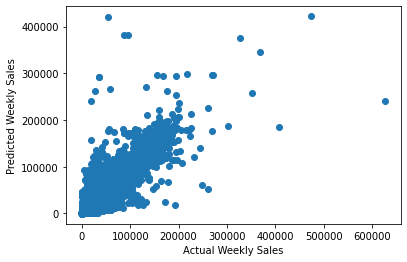

In [77]:
# Plot the prediction on a graph
ytest_array = np.array(ytest)

plt.scatter(ytest_array, dtr_test_pred)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')

--------------------------------------------
_XGBoost Model_

In [78]:
regressor = XGBRegressor()
xgb_model = regressor.fit(xtrain, ytrain)

xgb_train_pred = xgb_model.predict(xtrain)
xgb_train_score = r2_score(ytrain, xgb_train_pred ) # check how well the model predicts itself
print('R-Squared value for train score check:', xgb_train_score )

# Predict on test data
xgb_pred = xgb_model.predict(xtest)
xgb_test_score = r2_score(ytest, xgb_pred) # check how well the model predicts foreign data
print('R-Squared value for xgboost model:', xgb_test_score )

# Mean Square Error
mse = mean_absolute_error(ytest, dtr_test_pred)
print('Mean Absolute Error:', mse)

R-Squared value for train score check: 0.9261417904996962
R-Squared value for xgboost model: 0.919235033678013
Mean Absolute Error: 2300.7222796925776


In [79]:
# Create a table to check the mean errors in the prediction
xgb_comparism = pd.concat([pd.Series(xgb_pred, name = 'pred_sales'), ytest.reset_index()], axis = 1)
xgb_comparism['error'] = xgb_comparism['Weekly_Sales'] - xgb_comparism['pred_sales']
xgb_comparism['squared_error'] = xgb_comparism['error']**2
print("RMSE: ",np.sqrt(xgb_comparism[['squared_error']].sum()))
xgb_comparism.drop('index', axis = 1, inplace = True)
xgb_comparism


RMSE:  squared_error    1.855568e+06
dtype: float64


,pred_sales,Weekly_Sales,error,squared_error
0,5019.580566,11469.25,6449.669434,4.159824e+07
1,8044.711426,6068.64,-1976.071426,3.904858e+06
2,42342.417969,32478.39,-9864.027969,9.729905e+07
3,18642.855469,19785.66,1142.804531,1.306002e+06
4,13372.502930,21682.72,8310.217070,6.905971e+07
...,...,...,...,...
84309,1221.072876,2484.44,1263.367124,1.596096e+06
84310,13317.852539,13590.35,272.497461,7.425487e+04
84311,21389.501953,27746.85,6357.348047,4.041587e+07
84312,4665.353027,3958.71,-706.643027,4.993444e+05


Text(0, 0.5, 'Predicted Weekly Sales')

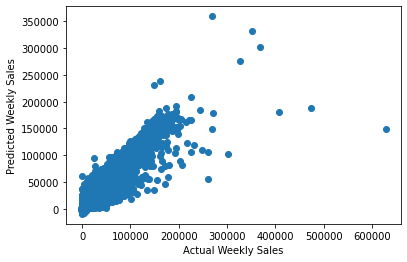

In [80]:
ytest_array = np.array(ytest)

plt.scatter(ytest_array, xgb_pred)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')

we can see a correlation btw the Predicted Weekly Sale and the Actual Weekly Sale

---------------------------------------------------
<h2 style='font-family:rockwell; color:#09917e'> THANKS</h2>